In [1]:
!pwd

/media/dalu/data/projects/LG_AI_all_in_one/tensorflow/day4/practice


In [2]:
import os
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

train_dir='../dataset/cats_and_dogs_small/train'
validation_dir='../dataset/cats_and_dogs_small/validation'
test_dir='../dataset/cats_and_dogs_small/test'

train_cats_dir= os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')
test_cats_dir= os.path.join(test_dir,'cats')
test_dogs_dir= os.path.join(test_dir,'dogs')

print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

# parameter
batch_size=20
learning_rate=0.0001
epochs=30


1 Physical GPUs, 1 Logical GPUs
훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [3]:
train_dir='../dataset/cats_and_dogs_small/train'
validation_dir='../dataset/cats_and_dogs_small/validation'
test_dir='../dataset/cats_and_dogs_small/test'


train_cats_dir= os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')
validation_cats_dir=os.path.join(validation_dir,'cats')
validation_dogs_dir=os.path.join(validation_dir,'dogs')
test_cats_dir= os.path.join(test_dir,'cats')
test_dogs_dir= os.path.join(test_dir,'dogs')
print(train_cats_dir)

../dataset/cats_and_dogs_small/train/cats


In [4]:

## DATA를 만듦
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()


In [5]:

## 만든데이터를 불러와서 파씽하면서 학습 데이터 생성
train_generator = train_datagen.flow_from_directory(
        directory=train_dir,         # 타깃 디렉터리
        target_size=(128, 128),      # 모든 이미지를 150 × 150 크기로 바꿉니다
        batch_size=batch_size,
        interpolation='bilinear',  ## resize시 interpolatrion 기법
        color_mode ='rgb',
        shuffle='True',
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary') # binary, categorical , sparse , input


## class의 인덱스를 확인.
#print(train_generator.__dict__)
print(train_generator.class_indices)
print(train_generator.classes)

validation_generator = valid_datagen.flow_from_directory(
        directory=validation_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        shuffle='True',
        interpolation='bilinear',  ## resize시 interpolatrion 기법
        color_mode='rgb',
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        directory=test_dir,
        target_size=(128, 128),
        batch_size=batch_size,
        shuffle='True',
        interpolation='bilinear',  ## resize시 interpolatrion 기법
        color_mode='rgb',
        class_mode='binary')

## 파씽한 데이터의 배치사이즈 확인하기
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    print('class :',train_generator.class_indices)
    break


Found 2000 images belonging to 2 classes.
{'cats': 0, 'dogs': 1}
[0 0 0 ... 1 1 1]
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
배치 데이터 크기: (20, 128, 128, 3)
배치 레이블 크기: (20,)
class : {'cats': 0, 'dogs': 1}


In [6]:

## 모델
input_Layer = tf.keras.layers.Input(shape=(128,128,3))
x=tf.keras.layers.Conv2D(32,(3,3),strides=1, activation=None)(input_Layer)
x= tf.keras.layers.BatchNormalization()(x)
x= tf.keras.layers.Activation(activation='relu')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)
x=tf.keras.layers.Conv2D(64,(3,3),strides=1,activation=None)(x)
x= tf.keras.layers.BatchNormalization()(x)
x= tf.keras.layers.Activation(activation='relu')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)
x=tf.keras.layers.Conv2D(128,(3,3),strides=1,activation=None)(x)
x= tf.keras.layers.BatchNormalization()(x)
x= tf.keras.layers.Activation(activation='relu')(x)
x=tf.keras.layers.Conv2D(64,(3,3),strides=1,activation=None)(x)
x= tf.keras.layers.BatchNormalization()(x)
x= tf.keras.layers.Activation(activation='relu')(x)
x=tf.keras.layers.MaxPool2D((2,2))(x)
x=tf.keras.layers.Flatten()(x)
x= tf.keras.layers.Dense(256, activation=None)(x)
x= tf.keras.layers.BatchNormalization()(x)
x= tf.keras.layers.Activation(activation='relu')(x)
x= tf.keras.layers.Dropout(rate=0.4)(x)
x= tf.keras.layers.Dense(512, activation=None)(x)
x= tf.keras.layers.BatchNormalization()(x)
x= tf.keras.layers.Activation(activation='relu')(x)
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
activation (Activation)      (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256   

In [7]:

loss_function=tf.keras.losses.binary_crossentropy
#optimize=tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

callbacks_list= [tf.keras.callbacks.TensorBoard(log_dir='log_dir', histogram_freq=1)]

## generator는 입력과 타깃의 배치사이즈 만큼 데이터를 생성함.
## steps_pr_epoch가 100이면 위에서 선언된 배치 수만큼의 인풋/아웃풋데이터가 100번 생성되어 학습이 된다.
##즉, 배치가 20이면 20의 배치인 데이터가 100번만큼 생성되어 학습한다. 즉, 20의 배치 데이터를 100번 학습완료하면 1에포크
## 단, 20의 배치데이터를 생성할때마다 랜덤적으로 생성한다.
## 일반적으로 배치사이즈/전체 데이터 길이를 steps_per_epoch로 설정한다.
history = model.fit(
      train_generator,
      steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size,
      epochs=100,
      validation_data=validation_generator,
      # callbacks=callbacks_list,
      validation_freq=1
)
print(model.evaluate(test_generator))

model.save('cats_and_dogs_binary_classification.hdf5')


Epoch 1/100
100/100 [==============================] - 17s 132ms/step - loss: 0.8754 - binary_accuracy: 0.5225 - val_loss: 14.4217 - val_binary_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 12s 123ms/step - loss: 0.7073 - binary_accuracy: 0.5655 - val_loss: 0.9293 - val_binary_accuracy: 0.5300
Epoch 3/100
100/100 [==============================] - 12s 120ms/step - loss: 0.6533 - binary_accuracy: 0.6185 - val_loss: 0.7512 - val_binary_accuracy: 0.5780
Epoch 4/100
100/100 [==============================] - 13s 127ms/step - loss: 0.6344 - binary_accuracy: 0.6455 - val_loss: 0.9975 - val_binary_accuracy: 0.5610
Epoch 5/100
100/100 [==============================] - 12s 121ms/step - loss: 0.5939 - binary_accuracy: 0.6840 - val_loss: 0.9106 - val_binary_accuracy: 0.5390
Epoch 6/100
100/100 [==============================] - 12s 116ms/step - loss: 0.5605 - binary_accuracy: 0.7105 - val_loss: 1.4431 - val_binary_accuracy: 0.5050
Epoch 7/100
100/100 [==================

KeyboardInterrupt: 

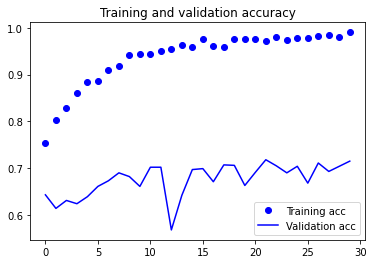

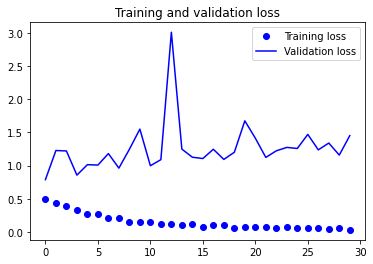

In [45]:

import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()